In [1]:
import pandas as pd
my_dataset = pd.read_csv('train.csv')
my_dataset.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [2]:
toxic_count=my_dataset.toxic.value_counts()
toxic_count_1=15294
severe_toxic_count=my_dataset.severe_toxic.value_counts()
severe_toxic_count_1=1595
obscene_count=my_dataset.obscene.value_counts()
obscene_count_1= 8449
threat_count=my_dataset.threat.value_counts()
threat_count_1=478
insult_count=my_dataset.insult.value_counts()
insult_count_1=7877
identity_hate_count=my_dataset.identity_hate.value_counts()
identity_hate_count_1=1405

In [3]:
data_count=my_dataset.iloc[:,2:].sum()
data_count

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

In [4]:
data_list= [['toxic_count_1',15294], ['severe_toxic_count_1', 1595], ['obscene_count_1', 8449],['threat_count_1', 478],['insult_count_1',7877],['identity_hate_count_1',1405]] 

In [5]:
df = pd.DataFrame(data_list, columns = ['Category', 'Comments']) 
df 

,Category,Comments
0,toxic_count_1,15294
1,severe_toxic_count_1,1595
2,obscene_count_1,8449
3,threat_count_1,478
4,insult_count_1,7877
5,identity_hate_count_1,1405


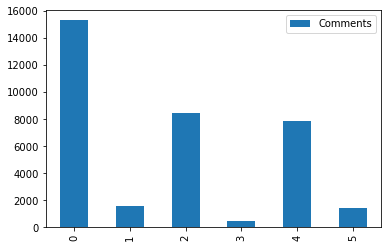

In [6]:
ax = df.plot.bar()

In [7]:
my_dataset.toxic.corr(my_dataset.severe_toxic)

0.30861909674069954

In [8]:
my_dataset.obscene.corr(my_dataset.insult)

0.741272436203952

In [9]:
x =my_dataset['comment_text']
y = my_dataset['toxic']

In [10]:
x

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=35)

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(max_features=5000,stop_words='english')

In [13]:
X_train_vect = vect.fit_transform(x_train)
X_train_vect

<111699x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 2258535 stored elements in Compressed Sparse Row format>

In [14]:
X_test_vect  = vect.transform(x_test)

In [15]:
X_test_vect  

<47872x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 969022 stored elements in Compressed Sparse Row format>

In [16]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg_fit=logreg.fit(X_train_vect, y_train)
print('logistic regression fitting done')

logistic regression fitting done


In [17]:
from sklearn.metrics import f1_score
f1_score(logreg.predict(X_test_vect), y_test)

0.7194225721784777

In [18]:
test = pd.read_csv('test.csv')

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
def data_cleaning(df):
    df['comment_text'] = df['comment_text'].replace('\n',' ', regex=True).replace('\r',' ', regex=True).replace('\t',' ', regex=True) #spaces
    df['comment_text'] = df['comment_text'].replace('\\n',' ', regex=True)
    df['comment_text'] = df['comment_text'].replace('http[S|s]*\S+|www.\S+',' ', regex=True) #Links
    df['comment_text'] = df['comment_text'].replace('\d+',' ', regex=True) #numbers
    df['comment_text'] = df['comment_text'].replace('\s{2,}',' ', regex=True) #multiple spaces
    df['comment_text'] = df['comment_text'].map(lambda x: x.strip()) #removing trailSpaces
    df['comment_text'] = df['comment_text'].str.replace('\W', ' ') #special characters => most of the puntuat
    return df
data_cleaning(my_dataset)
data_cleaning(test)

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you ll...
1,0000247867823ef7,From RfC The title is fine as it is IMO
2,00013b17ad220c46,Sources Zawe Ashton on Lapland
3,00017563c3f7919a,If you have a look back at the source the in...
4,00017695ad8997eb,I don t anonymously edit articles at all
...,...,...
153159,fffcd0960ee309b5,i totally agree this stuff is nothing but t...
153160,fffd7a9a6eb32c16,Throw from out field to home plate Does...
153161,fffda9e8d6fafa9e,Okinotorishima categories I see your c...
153162,fffe8f1340a79fc2,One of the founding nations of the EU ...


In [20]:
my_dataset=data_cleaning(my_dataset)
test=data_cleaning(test)

In [21]:
my_dataset.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation Why the edits made under my userna...,0,0,0,0,0,0
1,000103f0d9cfb60f,D aww He matches this background colour I m se...,0,0,0,0,0,0
2,000113f07ec002fd,Hey man I m really not trying to edit war It s...,0,0,0,0,0,0
3,0001b41b1c6bb37e,More I can t make any real suggestions on impr...,0,0,0,0,0,0
4,0001d958c54c6e35,You sir are my hero Any chance you remember wh...,0,0,0,0,0,0


In [22]:
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you ll...
1,0000247867823ef7,From RfC The title is fine as it is IMO
2,00013b17ad220c46,Sources Zawe Ashton on Lapland
3,00017563c3f7919a,If you have a look back at the source the info...
4,00017695ad8997eb,I don t anonymously edit articles at all


In [23]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

def function(df_done,label):

    x = df_done.comment_text
    y = df_done[label]

    # Split our data into training and test data 
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

    vect = TfidfVectorizer(max_features=5000,stop_words='english')
    X_train_vect = vect.fit_transform(x_train)
    
    X_train_vect = vect.fit_transform(x_train)
    X_test_vect  = vect.transform(x_test)


    lr = LogisticRegression()
    lr.fit( X_train_vect, y_train)
   
    mnaive = MultinomialNB()
    mnaive.fit(X_train_vect, y_train)
       
    svm_model = LinearSVC()
    svm_model.fit(X_train_vect, y_train)

    randomforest = RandomForestClassifier(n_estimators=100, random_state=42)
    randomforest.fit(X_train_vect, y_train)
    
    f1_score_data = {'F1 Score':[f1_score(mnaive.predict(X_test_vect), y_test),f1_score(svm_model.predict(X_test_vect), y_test), f1_score(randomforest.predict(X_test_vect), y_test),f1_score(lr.predict(X_test_vect), y_test)]} 

    full_dataframe = pd.DataFrame(f1_score_data, index=['MultinomialNB', 'SVM', 'Random Forest','Logistic Regression'])  

    return full_dataframe


In [24]:
score_toxic=function(my_dataset,'toxic') 

In [25]:
score_toxic

,F1 Score
MultinomialNB,0.662745
SVM,0.751583
Random Forest,0.745112
Logistic Regression,0.726607


In [26]:
score_severe_toxic=function(my_dataset,'severe_toxic')

In [27]:
score_obscene=function(my_dataset,'obscene')

In [28]:
score_severe_toxic

,F1 Score
MultinomialNB,0.246256
SVM,0.322485
Random Forest,0.129496
Logistic Regression,0.364154


In [29]:
score_obscene

,F1 Score
MultinomialNB,0.678922
SVM,0.774094
Random Forest,0.794566
Logistic Regression,0.747278


In [30]:
score_threat=function(my_dataset,'threat')

In [31]:
score_insult=function(my_dataset,'insult')

C:\Users\Saba\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
score_identity_hate=function(my_dataset,'identity_hate')

In [33]:
f1_scores = pd.concat([score_toxic,score_severe_toxic,score_obscene,score_threat,score_identity_hate], axis=1)
f1_scores

,F1 Score,F1 Score,F1 Score,F1 Score,F1 Score
MultinomialNB,0.662745,0.246256,0.678922,0.000000,0.106610
SVM,0.751583,0.322485,0.774094,0.357143,0.314136
Random Forest,0.745112,0.129496,0.794566,0.105960,0.199601
Logistic Regression,0.726607,0.364154,0.747278,0.228916,0.245211


In [34]:
#selecting logistic regression

In [35]:
def pickle_model(df, label):
    
   
    # saves the column labels (ie. the vocabulary)
    # wb means Writing to the file in Binary mode, written in byte objects
    with open(r"{}.pkl".format(label + '_vect'), "wb") as f:   
        pickle.dump(tfv, f)   
        
    randomforest = RandomForestClassifier(n_estimators=100, random_state=42)
    randomforest.fit(X_vect, y)

    # Create a new pickle file based on random forest
    with open(r"{}.pkl".format(label + '_model'), "wb") as f:  
        pickle.dump(randomforest, f)

In [36]:
import pickle
pickle_model(my_dataset,'toxic')

NameError: name 'tfv' is not defined

In [ ]:
pickle_model(my_dataset,'severe_toxic')
pickle_model(my_dataset,'obscene')
pickle_model(my_dataset,'threat')
pickle_model(my_dataset,'insult')
pickle_model(my_dataset,'identity_hate')